In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import signal
import numpy.random as rnd


#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)

In [3]:
mu = avg_crb = 5 #mu
k = avg_source_rays = 7

x = np.arange(stats.poisson.ppf(0.01, mu),
              stats.poisson.ppf(0.99, mu))

dist = stats.poisson.pmf(x, mu)

# Problem 1

On lecture and homework we explored how the convolution can be used to calculate the probability of a sum or average. For this problem we are going to imagine that we are looking for gamma-ray sources (e.g. with the Fermi telescope). In this kind of telescope there is a background of cosmic-rays (electrons and protons, mostly) that provides a discrete noise term across the sky that precisely follows a Poisson distribution. To detect a gamma-ray source, you need to ask what is the probability that the cosmic-ray background would have given you a measurement as signal-like or more than the signal that you received.

To set up the problem, assume in 1 day the average cosmic-ray background is some number X (I picked 5); and the average number of gamma-rays emitted by your hypothetical source is Y (I picked 7).

In [4]:
def convoluter (ndays, dist):
    conv_last = dist
    for i in range(ndays):
        conv_new = signal.convolve(conv_last, dist)
        conv_last = conv_new
        print('convolution' + str(i+1))

    x_new = np.linspace(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.99, mu), np.size(conv_new))
    
    return conv_new, x_new

In [5]:
def avg_grapher (conv, x, ndays):
    avg = x/ndays

    fig, ax = plt.subplots(1,2)
    ax[1].set_yscale('log')
    ax[0].plot(avg, conv, 'bo-')
    ax[1].plot(avg, conv, 'bo-')

In [6]:
def grapher (conv, x):
    fig, ax = plt.subplots(1,2)
    ax[1].set_yscale('log')
    ax[0].plot(avg, conv, 'bo-')
    ax[1].plot(avg, conv, 'bo-')

A) Show how the probability distribution of the background changes as you integrate (sum) for more days.

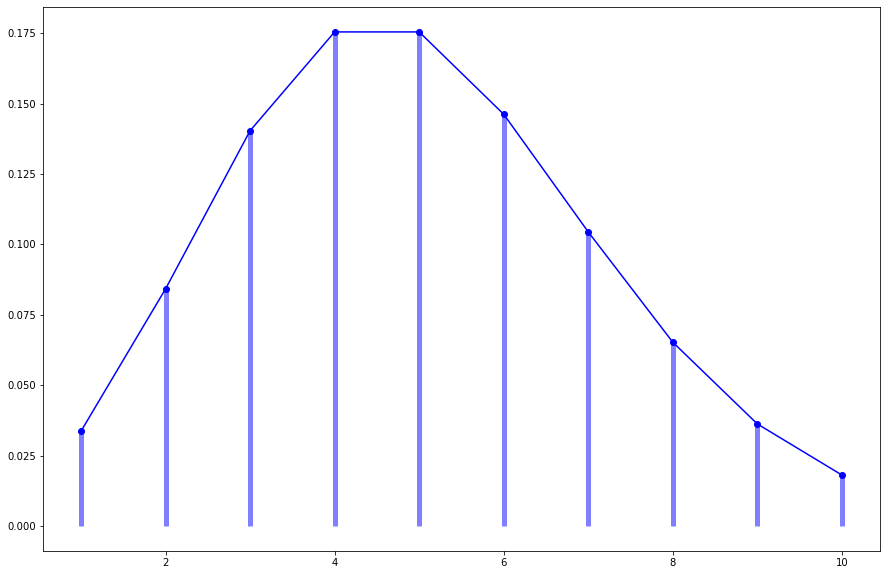

In [7]:
fig, ax = plt.subplots(1,1)

ax.plot(x, stats.poisson.pmf(x, mu), 'bo-')
ax.vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5, label = 'base poisson')

In [8]:
conv, x2 = convoluter(1, dist)


convolution1
